# Исследование объявлений о продаже квартир

Имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

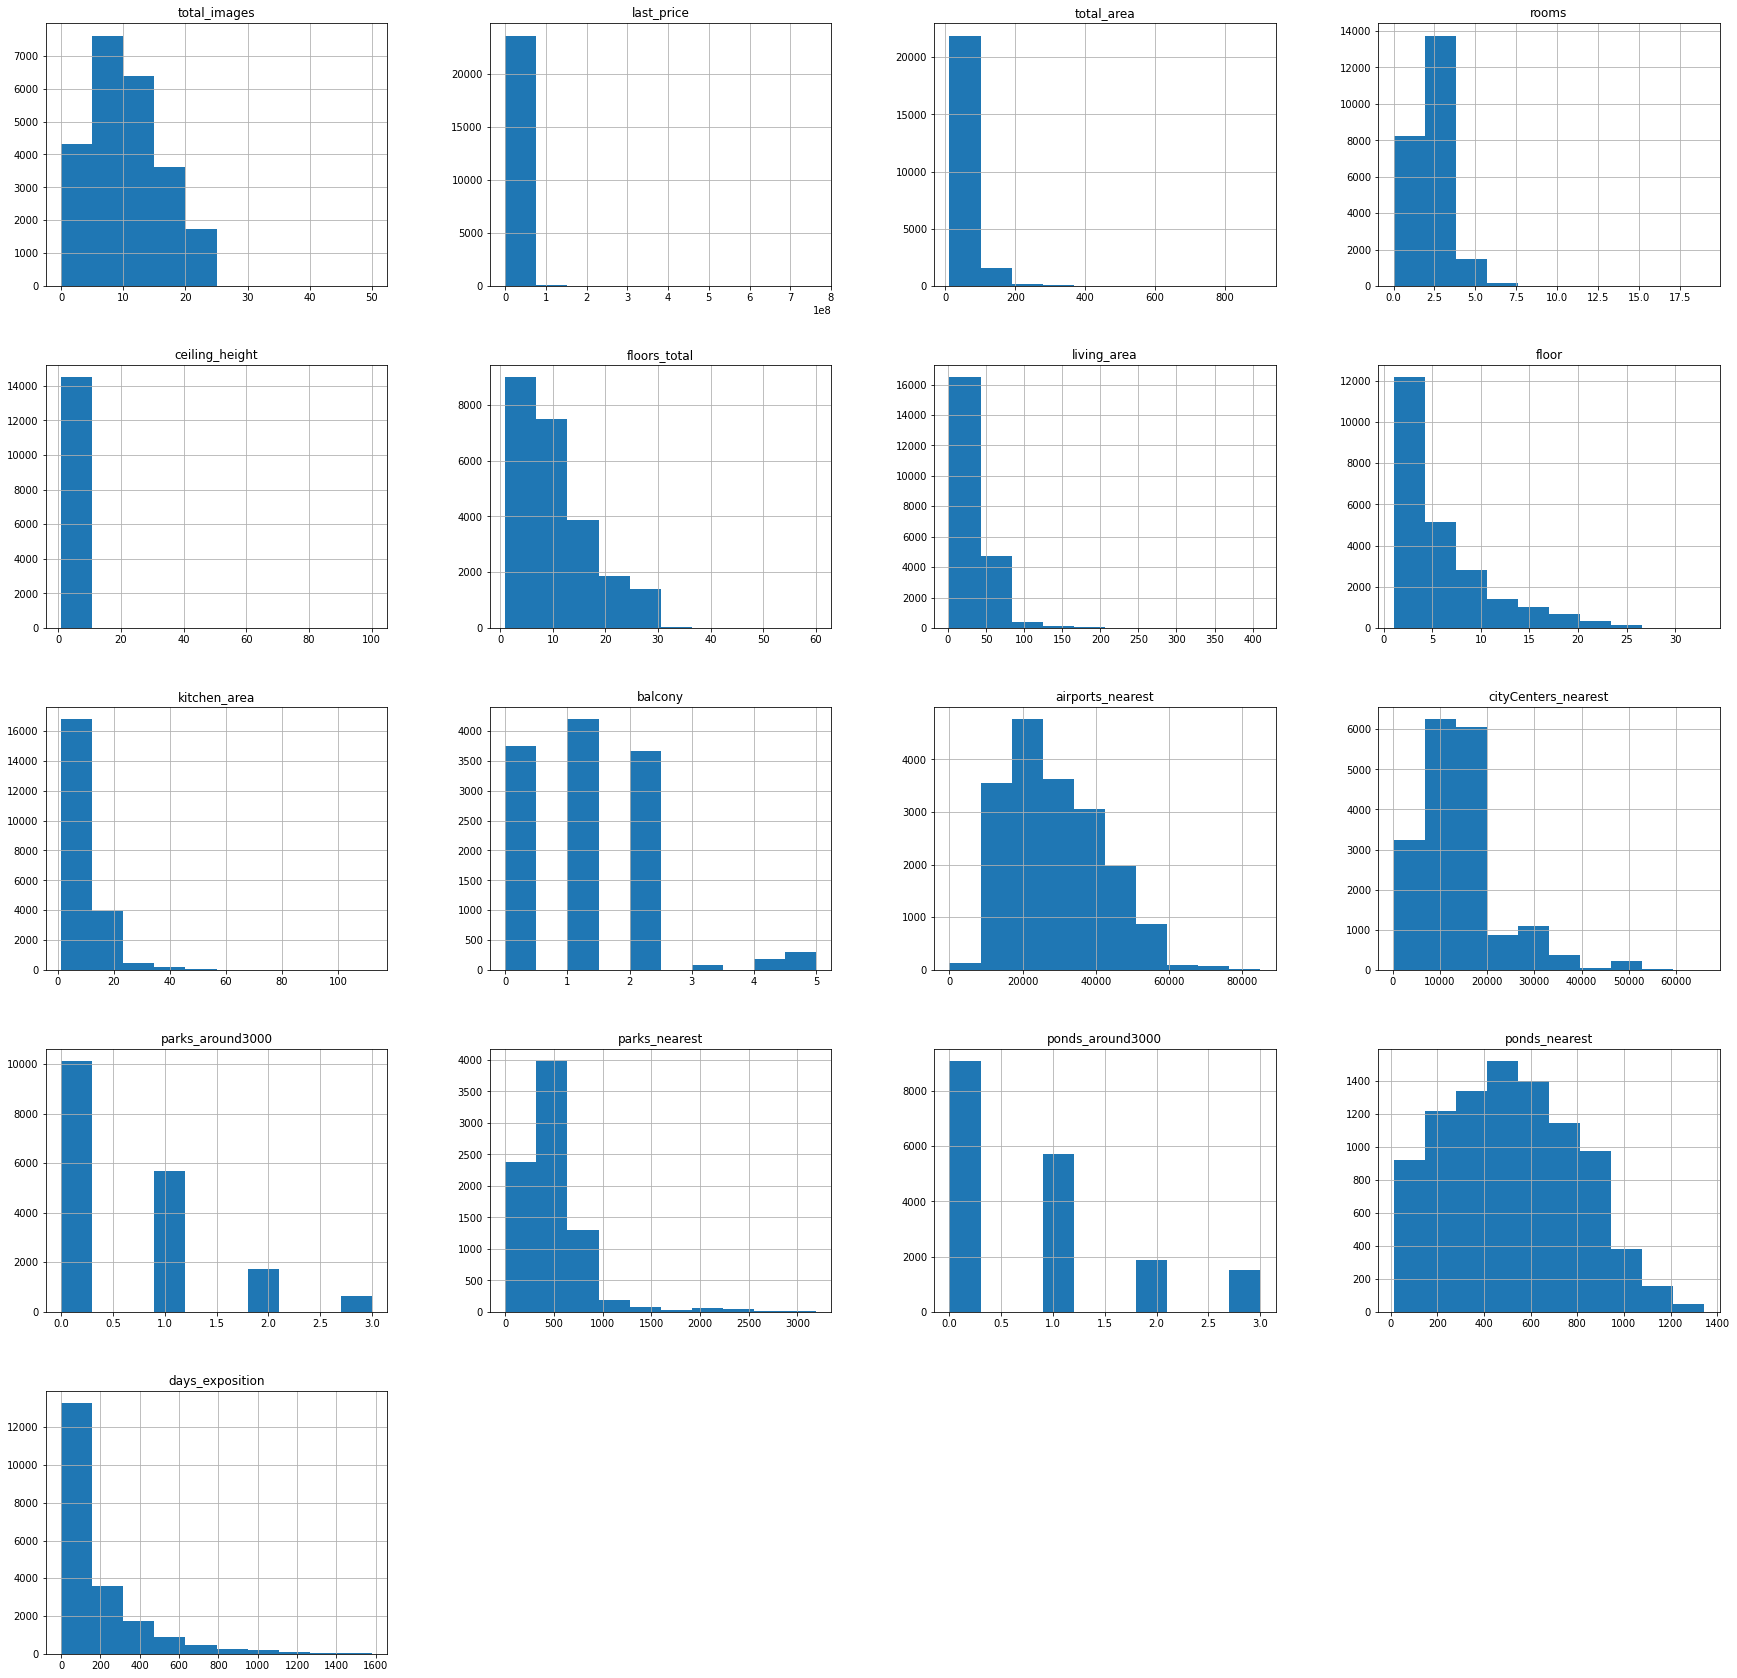

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
print(data.head())
data.info()
data.hist(figsize=(30, 30))


In [2]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Выводы: в столбце is_apartment должен быть тип bool, в столбцах floors_total, balcony, parks_around3000, ponds_around3000 , days_exposition тип значения должен быть int , и в столбце first_day_exposition - должен быть тип datetime
Судя по гистограммам больше всего двух и трёх комнатных квартир. Большинство квартир имеют один балкон, но есть квартиры с 4 и 5 балконами. Большая часть квартир имеет жилую площадь менее 50 м^2.

### Предобработка данных

In [3]:
print(data['balcony'].value_counts())
# изменим тип данных и заменим пропуски
data['balcony'] = data['balcony'].fillna(0).astype('int')

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


In [4]:
print(data['ceiling_height'].value_counts())
# в столбце ceiling_height есть слишком большие значения
data['ceiling_height'].sort_values(ascending=False)
#вероятно, здесь произошла опечатка. Потолок не 32 м, а 3,2 м ; не 100 м, а 10 м.


2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64


22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
         ...  
23687      NaN
23690      NaN
23692      NaN
23695      NaN
23696      NaN
Name: ceiling_height, Length: 23699, dtype: float64

In [5]:
#в столбце is_apartment пропуски заменим на False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [6]:
#изменим last_price на тип int
data['last_price'] = data['last_price'].astype('int')

In [7]:
#изменим тип данных в столбце first_day_exposition в формат без времени, так как время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
#пропуски в столбцах картографических данных заменять не будем, так как понять их появление сложно

In [8]:
#рассмотрим столбцы living_area и kitchen_area , для заполнения пропусков найдём коэффициент соотношения площадей
mis = data[data['living_area'].isnull() == False]['total_area'].mean()
not_mis = data.loc[data['living_area'] != 'NaN', 'living_area'].mean()
koef_liv = not_mis/mis
print(koef_liv)
koef_kit = data.loc[data['kitchen_area'] != 'NaN', 'kitchen_area'].mean() / data[data['kitchen_area'].isnull() == False]['total_area'].mean()
print(koef_kit)
data['living_area'] = data['living_area'].fillna(data['total_area'] * koef_liv)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * koef_kit)


0.5734446218294131
0.17398892610297417


In [9]:
data.duplicated().sum() # cтрок - дубликатов нет
#устранение неявных дубликатов
#изучим стобец locality_name
data['locality_name'].value_counts()
print(len(data['locality_name'].unique()))
# видим, что есть неявные дубликаты: посёлок Мурино, Мурино и поселок Мурино, то же самое видим и в других названиях
# устраним их, удалив названия населённых пунктов
names = ['городской посёлок ', 'городской поселок ','поселок городского типа ','посёлок городского типа ','коттеджный поселок ','коттеджный посёлок ','садовое товарищество ','садоводческое некоммерческое товарищество ','посёлок при железнодорожной станции ','посёлок станции ','поселок при железнодорожной станции ','поселок станции ','посёлок ','поселок ','деревня ','село ']
for i in names:
    data['locality_name'] = data['locality_name'].str.replace(i, '')
print(len(data['locality_name'].unique()))
#количество уникальных значений снизилось с 365 до 306

365
306


In [10]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [11]:
#устраним редкие и выбивающиеся значения
#в столбце ceiling_height заменим пустые значения высоты потолков на медианное значение
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
print(data['ceiling_height'].sort_values())
ceiling_median = data['ceiling_height'].median()
# по санпину минимальная высота потолка 2,4 м , заменим те значения,которые меньше на 2,4 м
# разделим значения, которые больше 24 м на 10
# заменим значения, которые больше 10 м на медиану
def ceil(row):
    ceiling_height = row['ceiling_height'] 
    if ceiling_height >= 25:
        return ceiling_height/10
    elif ceiling_height < 2.4 :
        return 2.4
    elif 10<ceiling_height<=24:
        return ceiling_median
    else:
        return ceiling_height
data['ceiling_height'] = data.apply(ceil, axis = 1)
print(data['ceiling_height'].sort_values())


22590      1.00
5712       1.20
16934      1.75
20520      2.00
552        2.00
          ...  
20478     27.00
21377     27.50
3148      32.00
22336     32.00
22869    100.00
Name: ceiling_height, Length: 23699, dtype: float64
5918      2.4
19329     2.4
5712      2.4
227       2.4
13462     2.4
         ... 
15743     8.0
17442     8.0
3474      8.0
5863      8.3
22869    10.0
Name: ceiling_height, Length: 23699, dtype: float64


In [12]:
# рассмотрим столбец total_area
print(data['total_area'].sort_values(ascending=False))
print(data['living_area'].sort_values(ascending=False))
# есть странные значения квартир с большой площадью, но их трогать не будем, так как в сравнении с жилой площадью выглядит логично

19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
         ...  
19558     13.2
19807     13.0
19546     13.0
17961     13.0
19904     12.0
Name: total_area, Length: 23699, dtype: float64
19540    409.700000
5358     409.000000
3117     361.843556
12401    347.500000
4237     332.000000
            ...    
17582      5.000000
23574      3.000000
3242       3.000000
13915      2.000000
21758      2.000000
Name: living_area, Length: 23699, dtype: float64


### Посчитайте и добавьте в таблицу новые столбцы

In [13]:
#цена одного квадратного метра
data['price_one_metr'] = data['last_price'] / data['total_area']

In [14]:
#день недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

#год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year


In [15]:
#тип этажа квартиры
# создадим функцию
def type_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['type_floor'] = data.apply(type_floor, axis = 1)


In [16]:
#расстояние до центра города в километрах
data['centr_km'] = data['cityCenters_nearest'] / 1000
data['centr_km'] = data['centr_km'].fillna(value=0).astype(int)

### Проведите исследовательский анализ данных

ШАГ 1

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

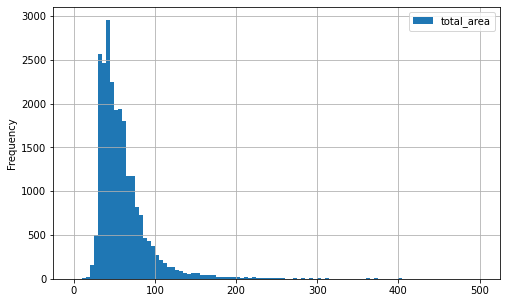

In [17]:
#изучим общую площадь
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (8,5), range = (0,500))
data['total_area'].describe()
#распределение данных нормальное, есть выбросы но они не сильно влияют на данные

Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. Распределение данных Гаусса.
Большинство квартир менее 100 квадратных метров. В подборке есть несколько очень больших и странных вариантов с площадью более 200 квадратных метров.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

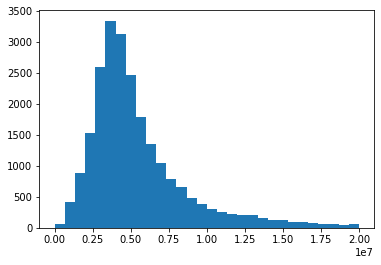

In [18]:
#изучим цену
plt.hist(data['last_price'], bins=30, range=(0,20000000))
data['last_price'].describe()
#распределение данных нормальное, но значения выводятся в экспоненциальной записи чисел


Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Распределение данных Гаусса.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

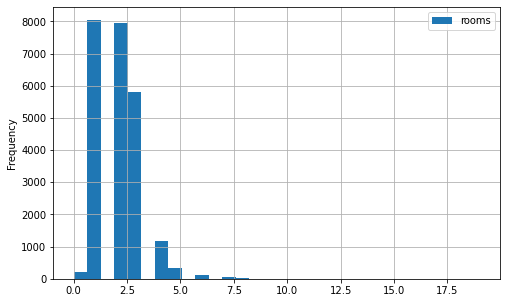

In [19]:
#изучим количество комнат
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (8,5))
data['rooms'].describe()
#с данными все впорядке

Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир.

count    23699.000000
mean         2.698330
std          0.236223
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

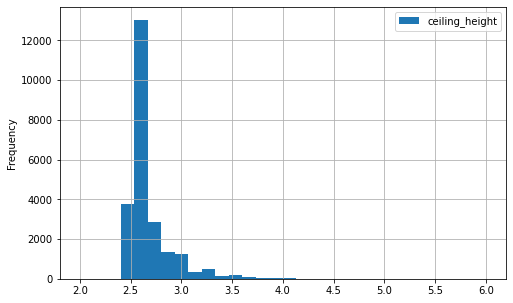

In [20]:
#изучим высоту потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,6), grid=True, figsize = (8,5))
data['ceiling_height'].describe()
#с данными все впорядке


Высота потолков в среднем составляет 2,7 м, медиана 2,65 м. Большинство квартир имеют высоту потолков от 2,5 до 3 метров

count    23699.000000
mean        34.606609
std         22.365867
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

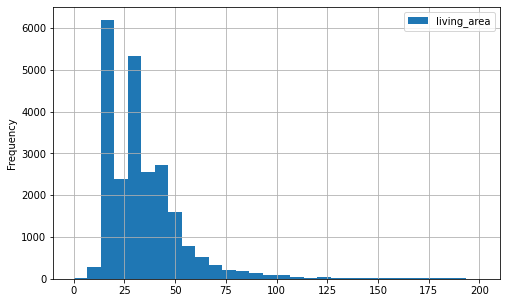

In [21]:
#изучим жилую площадь
data.plot(y = 'living_area', kind = 'hist', bins = 30, range = (0,200), grid=True, figsize = (8,5))
data['living_area'].describe()
#распределение данных нормальное, есть выбросы но они не сильно влияют на данные


Самые распространённые варианты с жилой площадью от 10 до 50 м. После 75 м встречаются единичные случаи. Пики на графике вызваны, возможно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной квартиры.

count    23699.000000
mean        10.499997
std          6.035287
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

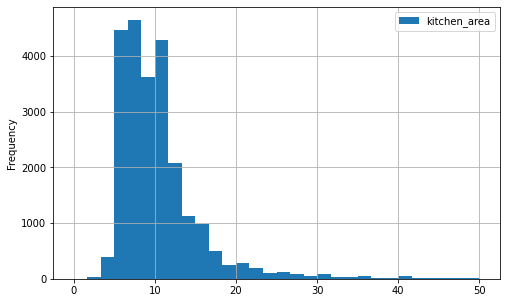

In [22]:
#изучим площадь кухни
data.plot(y = 'kitchen_area', kind = 'hist', bins = 30, range = (0,50), grid=True, figsize = (8,5))
data['kitchen_area'].describe()
#распределение данных нормальное, есть выбросы но они не сильно влияют на данные

Самые распространённые кухни - примерно от 5 до 15 м. Больше 20 м кухни встречаются редко. 
Больше 30 - единичные случаи.

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

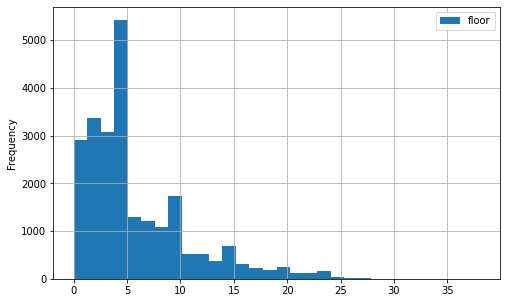

In [23]:
#изучим этаж квартиры
data.plot(y = 'floor', kind = 'hist', bins = 30, range = (0,38), grid=True, figsize = (8,5))
data['floor'].describe()

Больше всего квартир находится на 4-5 этажах. Высотки выше 25 этажей встречаются крайне редко

<AxesSubplot:>

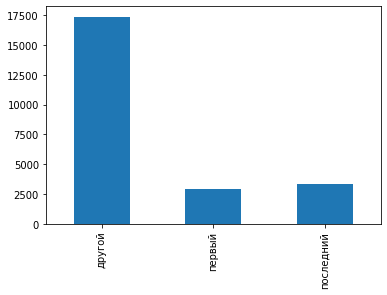

In [24]:
plt.show()
#изучим тип этажа квартиры
data['type_floor'].value_counts().sort_index(ascending=True).plot.bar()

Больше всего квартир находится ни на первом и ни на последнем этажах. 
Количество квартир на первом и последнем этажах примерно одинаково

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

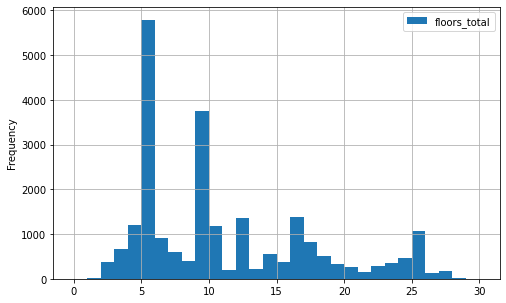

In [25]:
#изучим общее количество этажей в доме
data.plot(y = 'floors_total', kind = 'hist', bins = 30, range = (0,30), grid=True, figsize = (8,5))
data['floors_total'].describe()

Больше всего 6 этажных домов. Чаще всего встречаются дома в 5, 6, 9, 12, 17 и 25 этажей

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

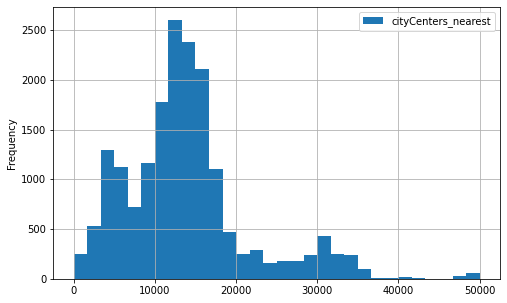

In [26]:
#изучим расстояние до центра города в метрах;
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, range = (0,50000), grid=True, figsize = (8,5))
data['cityCenters_nearest'].describe()


распределение данных нормальное. Больше всего квартир находится в диапазоне от 10000 м до 20000 м от центра

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

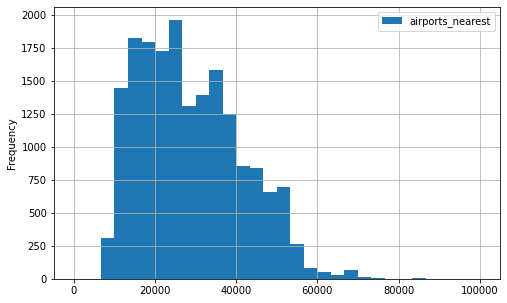

In [27]:
#изучим расстояние до ближайшего аэропорта;
data.plot(y = 'airports_nearest', kind = 'hist', bins = 30, range = (0,100000), grid=True, figsize = (8,5))
data['airports_nearest'].describe()

Большинство квартир находится в диапазоне от 10000 м до 40000 м от аэропорта. Так же минимальное значение 0 м, что говорит о выбросах в данных

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

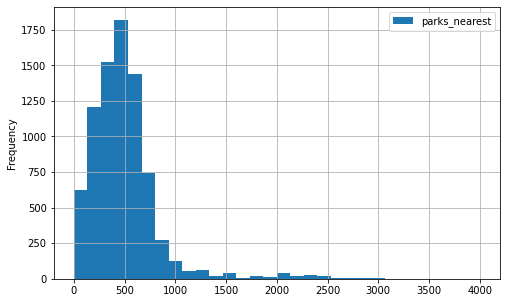

In [28]:
#изучим расстояние до ближайшего парка;
data.plot(y = 'parks_nearest', kind = 'hist', bins = 30, range = (0,4000), grid=True, figsize = (8,5))
data['parks_nearest'].describe()

Большинство квартир находится близко к парку: в диапазоне от 200 м до 800 м. Квартиры, которые находятся дальше 2500 м от парка встречаются крайне редко. 

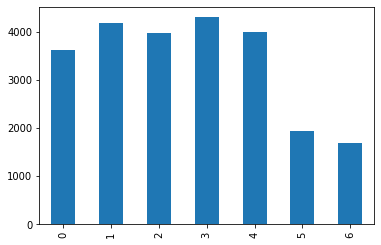

<AxesSubplot:>

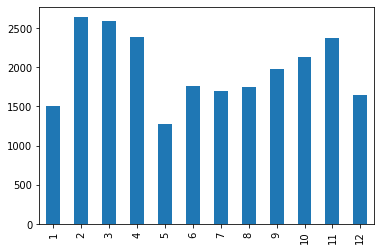

In [29]:
#изучим день и месяц публикации объявления.
plt.show()
data['weekday_exposition'].value_counts().sort_index(ascending=True).plot.bar()
plt.show()
data['month_exposition'].value_counts().sort_index(ascending=True).plot.bar()

Меньше всего объявлений публиковалось в мае, больше всего в феврале

В среднем в выходные публиковалось меньше объявлений

ШАГ 2

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64


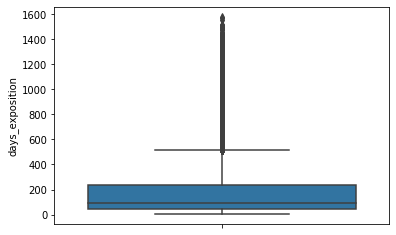

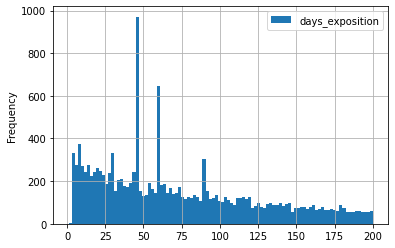

In [30]:
sns.boxplot(y=data['days_exposition'])
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана
print(data['days_exposition'].describe())
print(data['days_exposition'].value_counts())


Мы имеем распределение Пуассона. Среднее значение - 180 дней, а медиана - 95 дней. С помощью гистограммы мы обнаружили выбивающиеся значения и методом value_counts убедились в этом - 45, 60, 7, 30, 90  - это наиболее популярное количество дней до снятия объявления. Эти выбивающиеся значения можно объяснить условиями размещения объявлении. По истечении этих сроков (в зависимости от указанного при размещении) объявления автоматически снимаются с публикации.
Диаграмма размаха у нас от минимального значения до примерно 500 дней. Значит необоснованно быстрых значений у нас нет, а необоснованно долгие - от 500 дней и выше. Значит нормальные значения у нас лежат от 1 до 500. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.



При вызове метода describe() обнаружили минимальное значение 1. Возможно, это выброс, нужно изучить количество таких объявлений


In [31]:
data[data['days_exposition']==1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,weekday_exposition,month_exposition,year_exposition,type_floor,centr_km
1632,19,4000000,49.9,2019-05-01,2,2.5,9.0,25.0,1,False,...,20.0,1.0,681.0,1.0,80160.320641,2,5,2019,первый,14


 Такое значение всего одно, оно не искажает данные



ШАГ 3

0.6536750579657242

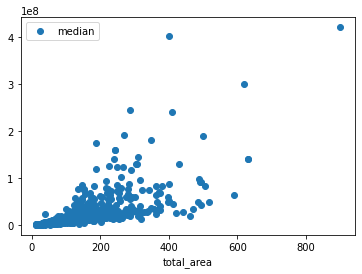

In [32]:
# изучим зависимость цены квартиры от общей площади
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

0.5858320218520142

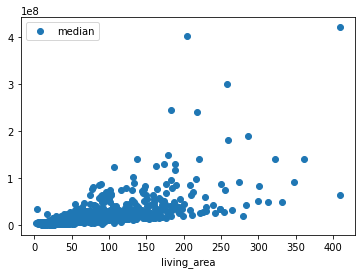

In [33]:
# изучим зависимость цены квартиры от жилой площади
pivot_table_total_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

0.5138729142866714

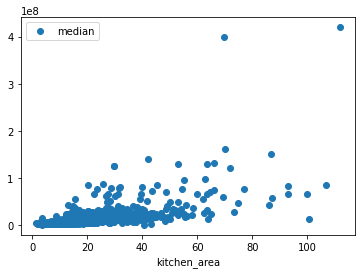

In [34]:
# изучим зависимость цены квартиры от площади кухни
pivot_table_total_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

0.3633428499648948

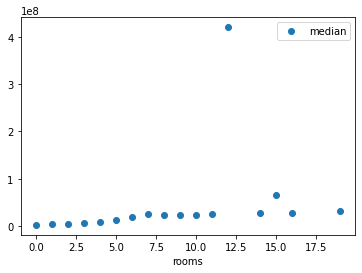

In [35]:
# изучим зависимость цены квартиры от количества комнат
pivot_table_total_area = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

<AxesSubplot:xlabel='type_floor'>

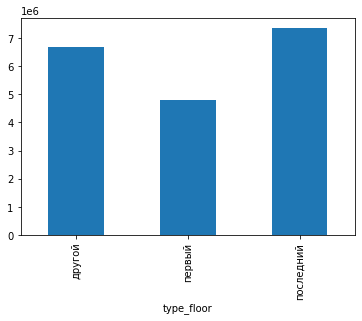

In [36]:
# изучим зависимость цены квартиры от этажа
plt.show()
data.groupby('type_floor')['last_price'].mean().plot.bar()

,mean,count,median
weekday_exposition,,,
1,6.394233e+06,4183,4730000
2,6.627970e+06,3974,4700000
0,6.511613e+06,3612,4650000
3,6.708663e+06,4295,4650000
4,6.372131e+06,4000,4585000
5,6.976804e+06,1936,4555000
6,6.246180e+06,1699,4550000


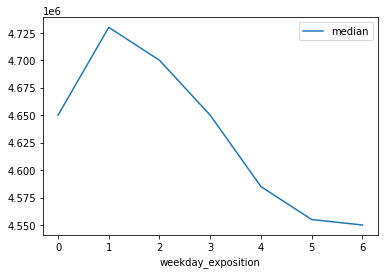

In [37]:
# изучим зависимость цены квартиры от даты размещения
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

,mean,count,median
month_exposition,,,
4,6.737198e+06,2379,4800000
9,6.825470e+06,1981,4700000
11,6.461363e+06,2371,4700000
12,7.011731e+06,1641,4700000
2,6.468500e+06,2640,4650000
3,6.359275e+06,2587,4650000
7,6.649337e+06,1695,4650000
1,6.668233e+06,1500,4600000
8,6.350233e+06,1744,4570000


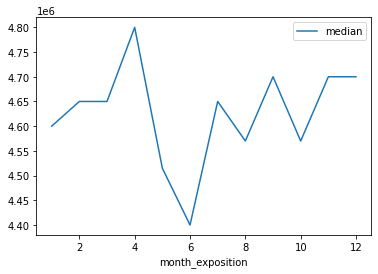

In [38]:
pivot_table_weekday_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

,mean,count,median
year_exposition,,,
2014,1.208714e+07,137,7700000
2015,8.572833e+06,1191,5350000
2019,6.782388e+06,2879,5050000
2016,6.827912e+06,2783,4550000
2018,5.950966e+06,8519,4550000
2017,6.585729e+06,8190,4500000


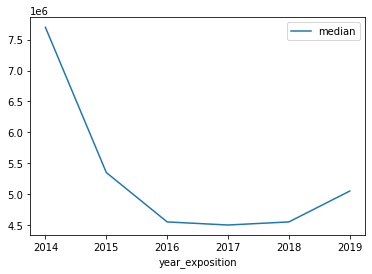

In [39]:
pivot_table_weekday_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

Выводы: больше всего на цену квартиры влияет общая площадь. Так же влияют жилая площадь и площадь кухни. Это объяснимо тем, что общая площадь, жилая площадь и площадь кухни коррелируют между собой. От числа комнат зависимость цены очень слабая. Чем ближе ко вторнику выставлены объявления, тем в среднем выше стоимость, но незначительно,ближе к выходным стоимость постепенно снижается. По субботам стоимость самая низкая. Что касается месяца, самая высокая цена в апреле и сентябре. Самая низкая стоимость в июне. Возможно присутствует сезонность - в начале лета предложение меньше как по количеству, так и по стоимости. Наверное, это связано с отпусками. С 2014 до 2016 года цена падала, до 2018 года почти не менялась, но после начала увеличиваться.Дешевле всех стоят квартиры на первом этаже, дороже всех - на последнем.

ШАГ 4

In [40]:

locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_one_metr', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
print(locality_pivot_table)
#самая высокая стоимость
print(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()])
#самая низкая стоимость
print(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()])

                 count           mean
locality_name                        
Санкт-Петербург  15721  114849.008794
Мурино             590   86087.512050
Кудрово            472   95324.930544
Шушары             440   78677.364217
Всеволожск         398   68654.473986
Пушкин             369  103125.819291
Колпино            338   75424.579098
Парголово          327   90175.913458
Гатчина            307   68746.146763
Выборг             237   58141.909153
                 count           mean
locality_name                        
Санкт-Петербург  15721  114849.008794
               count          mean
locality_name                     
Выборг           237  58141.909153


самая высокая стоимость жилья в Санкт-Петербурге, а самая низкая - в Выборге

ШАГ 5

          price_one_metr
centr_km                
0          174402.044501
1          166603.755531
2          146662.860056
3          129416.344615
4          137475.497055
5          146979.232519
6          152277.893519
7          141399.731456
8          120581.349830
9          110012.549686
10         111641.287182
11         106790.883882
12         108295.769255
13         107209.143992
14         104986.483351
15         101883.116013
16         100085.601721
17          94095.872357
18          94831.953162
19          95434.377295
20         107046.166047
21          91492.688149
22          88714.696974
23          92720.641577
24          82440.343912
25          91136.018511
26          75171.911041
27         132115.709459
28          81840.638722
29          62482.404228


<AxesSubplot:xlabel='centr_km'>

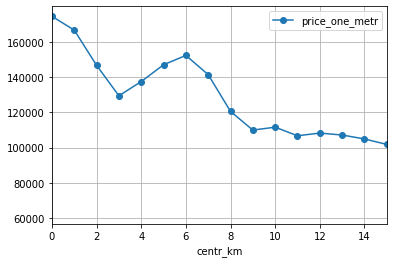

In [41]:
Saint_Petersburg_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'centr_km', values = 'price_one_metr', aggfunc = 'mean')
print(Saint_Petersburg_km)
Saint_Petersburg_km.plot(grid=True, style='o-', xlim=(0,15))


Стоимость объектов высокая, если расстояние до центра города до 6 км. Чем дальше от центра, тем цена квартир ниже

### Общий вывод


В ходе анализа данных сделали предобработку,убрав неявные дубликаты в населённых пунктах. Так же заполнили пропуски в жилой площади и площади кухни с помощью коэффициентов. Убрали аномальные значения в столбце высота потолков, добавили новые столбцы для исследования. В ходе иследования выяснили, что на цену квартиры больше всего влияет площадь. Незначительно на цену влияет количество комнат, день, месяц, год размещения.Выявили сезонность по месяцам. В 2016-2017 годах цена квартир была самой низкой,с 2018 года начала дорожать. Возможно, это связано с кризисом 2014 года. По изменению цен в зависимости от удаления от центра, центр составляет примерно 6 км. Выяснили, что самая высокая стоимость жилья в Санкт-Петербурге, а самая низкая в Выборге. 
Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. 
Выяснили, что большинство квартир - менее 100 квадратных метров, в среднем высота потолков после предобработки данных от 2,5 м до 3 м. В основном стоимость квартир около 4,5 миллионов. Больше 20 миллионов вариантов мало. В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно и подозрительно
